### Convolution operation
$$ (a \ast b)_n = \sum_{\substack{i, j \\ i+j=n}} a_i \cdot b_j$$ 
$$ (a \ast b)_n = \sum_{i=0}^n a_i \cdot b_{n-i}$$ 


In [1]:
import numpy as np

from scipy.signal import fftconvolve

In [2]:
# Example.
a = np.array([1, 2, 3]) 
b = np.array([4, 5, 6])

convolution = np.zeros(len(a) + len(b) - 1)

for i in range(len(a)):
    for j in range(len(b)):
        convolution[i + j] += a[i] * b[j]

print(convolution)

[ 4. 13. 28. 27. 18.]


In [3]:
%%timeit
a = np.random.random(10000)
b = np.random.random(10000)

np.convolve(a, b)

27.9 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%%timeit

fftconvolve(a, b)

79.8 µs ± 4.38 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Object Detection in 2d Images

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, signal
from PIL import Image

### Naive face detection

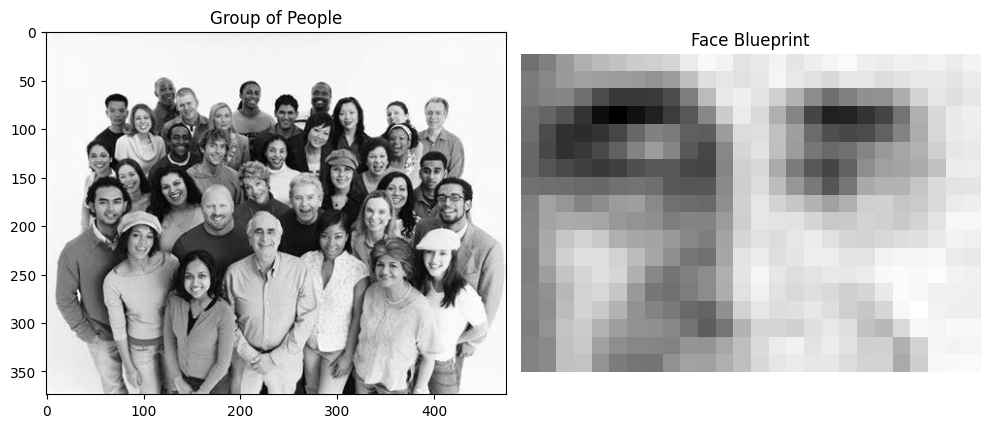

In [108]:
people_img = Image.open("./images/group_of_people.jpg")
face_img = Image.open("./images/group_member_2.jpg")

# 2d arrays
people_img = np.asarray(people_img)/255
people_img = np.mean(people_img, axis=2)

face_img = np.asarray(face_img)/255
face_img = np.mean(face_img, axis=2)
face_img /= face_img.max()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.imshow(people_img, cmap="gray")
ax1.set_title("Group of People")

ax2.imshow(face_img, cmap="gray")
ax2.axis("off")
ax2.set_title("Face Blueprint")

plt.tight_layout()
plt.show()

In [109]:
print("Face img shape: ", np.asarray(face_img).shape)
print("Group img shape: ", np.asarray(people_img).shape)


Face img shape:  (18, 26)
Group img shape:  (374, 474)


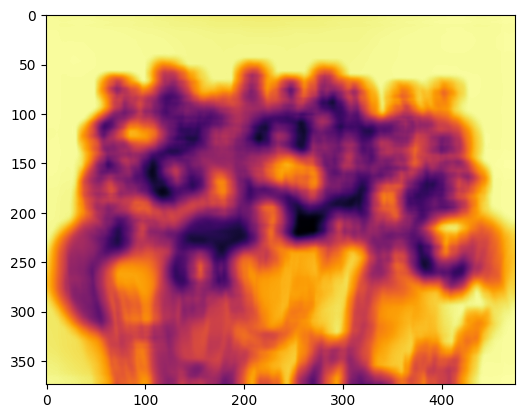

In [111]:
fig, ax = plt.subplots()
result = ndimage.correlate(people_img, face_img)


ax.imshow(result, cmap="inferno")
plt.show()

798.0307210398038

### Naive border detection